# **QUESTION 01:**

In [33]:
import pandas as pd

In [34]:
df = pd.read_csv("patient_data.csv")

In [35]:
import seaborn as sns

<Axes: >

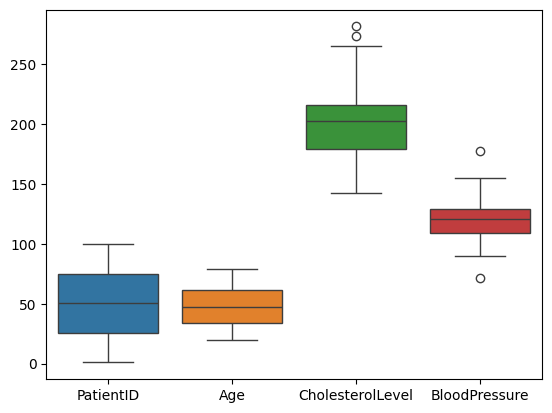

In [36]:
sns.boxplot(df)

In [37]:
df

,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High
...,...,...,...,...,...,...,...
95,96,Female,58,224.8,126.9,East,High
96,97,Female,68,200.4,123.0,North,Medium
97,98,Female,71,243.6,111.0,West,Low
98,99,Female,51,192.1,121.0,West,High


Text(0.5, 1.0, 'BEFORE REMOVING OUTLIERS')

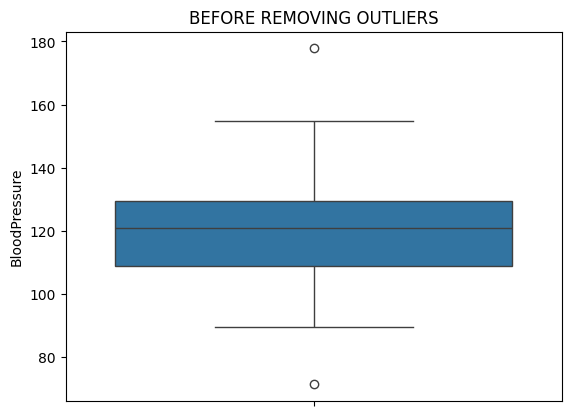

In [38]:
sns.boxplot(df["BloodPressure"])
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("BEFORE REMOVING OUTLIERS")


In [39]:
Q1  = df["BloodPressure"].quantile(0.25)
Q3 = df["BloodPressure"].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(20.724999999999994)

In [40]:
lower_fence_value = Q1 - (1.5*IQR)
upper_fence_value = Q3 + (1.5*IQR)


In [41]:
df_new = df[(df['BloodPressure'] >= lower_fence_value) & (df['BloodPressure'] <= upper_fence_value)]

Text(0.5, 1.0, 'AFTER REMOVING OUTLIERS')

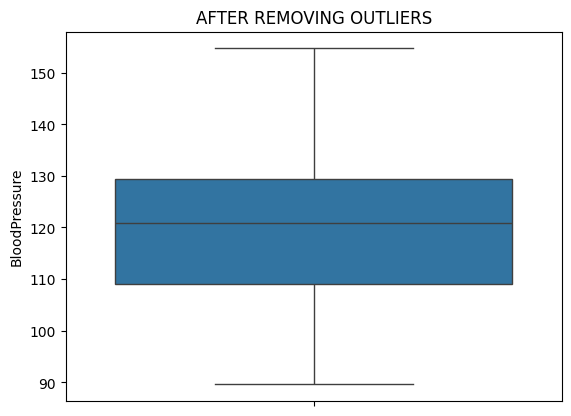

In [42]:
sns.boxplot(df_new["BloodPressure"])
plt.title("AFTER REMOVING OUTLIERS")

# **QUESTION 03:**

In [49]:
import numpy as np
from scipy.integrate import odeint
def B_stream(t , C):
  k = 0.05
  D = 120
  dCdt = k * (D - C)
  return dCdt


In [50]:
C = 0
t = np.linspace(0, 100)
sol_ = odeint(B_stream, y0=C, t=t, tfirst=True)

Text(0, 0.5, 'SOL')

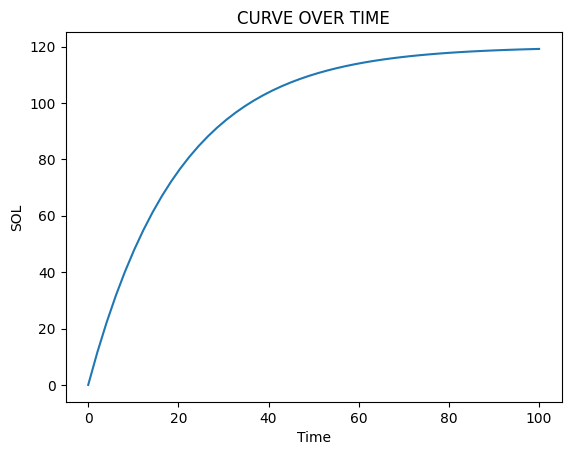

In [51]:

plt.plot(t, sol_)
plt.title("CURVE OVER TIME")
plt.xlabel("Time")
plt.ylabel("SOL")

# **QUESTION 02:**

**BY T TEST:**

In [60]:
import scipy.stats as stats

# Here we have Null Hypothesis to be 195
# Here we have Alternate Hypothesis to not be 195

cholesterol_level = df['CholesterolLevel']
print(cholesterol_level)


0     193.4
1     210.7
2     244.3
3     184.5
4     175.7
      ...  
95    224.8
96    200.4
97    243.6
98    192.1
99    281.6
Name: CholesterolLevel, Length: 100, dtype: float64


In [53]:
len(cholesterol_level)


100

In [61]:
cholesterol_level_mean = np.mean(cholesterol_level)
print(cholesterol_level_mean)

201.77699999999996


In [62]:
sample_size = 20
cholesterol_sample = np.random.choice(cholesterol_level, sample_size)
print(cholesterol_sample)

[178.6 256.  187.4 162.9 177.4 197.8 173.3 212.1 195.2 176.5 243.6 184.5
 157.9 184.1 256.9 162.9 175.5 192.1 170.8 256. ]


In [58]:
t_test, p_value = stats.ttest_1samp(cholesterol_sample, 195)
print(t_test)
print(p_value)

0.8193671808722521
0.4227364045538935


In [63]:
if p_value > 0.05:
    print("WE WILL ACCEPT THE NUll HYPOTHESIS")
else:
    print("WE WILL REJECT THE NULL HYPOTHESIS")


WE WILL ACCEPT THE NUll HYPOTHESIS


**BY CHI SQUARE:**

In [64]:
from scipy.stats import chi2_contingency

# Gender and RiskCategory are independent saying Null Hypothesis
# Gender and RiskCategory are dependent saying Alternate Hypothesis

contingency_table = pd.crosstab(df['Gender'], df['RiskCategory'])
print(contingency_table)

RiskCategory  High  Low  Medium
Gender                         
Female          13   19      24
Male            12   18      14


In [65]:
chi2_val, p_value, dof, expected_vals = chi2_contingency(contingency_table)
print(chi2_val , p_value)

1.2769946980473286 0.5280853561197303


In [66]:

if p_value > 0.05:
    print("WE WILL ACCEPT THE NUll HYPOTHESIS")
else:
    print("WE WILL REJECT THE NULL HYPOTHESIS")

WE WILL ACCEPT THE NUll HYPOTHESIS


In [69]:
print("In both tests, we fail to reject the null hypothesis since the p-values are above 0.05, indicating the results lie within the expected range (confidence interval)")

In both tests, we fail to reject the null hypothesis since the p-values are above 0.05, indicating the results lie within the expected range (confidence interval)
